In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.fft import fft, fftfreq
from scipy import stats as st
import math
from astropy import constants as const
import pandas as pd
import scipy.linalg as lin
from statsmodels.tsa.seasonal import seasonal_decompose


# Constants
l = 1
g = 1
theta0 = math.pi/4
dtheta0 = 0
m = 1


# The Df is 1, only theta and dtheta need to be set
x0 = np.array([theta0, 0])

#Calculate theoretical mechanic energy

ME_theo = -m*g*l*math.cos(theta0)+1/2*m*l**2*dtheta0**2


# Control function, the deduction is from another pdf.
def func(t, status):
    
    theta, dtheta = status
    ddtheta = -g*math.sin(theta)/l
    
    return dtheta, ddtheta

#Define the range of values to solve over
#Initial time
ti = 0 
#Final time
tf = 20 
# Duration
t_span = np.array([ti,tf])


#Define the range of values to be kept and output
NVals = 25*(tf-ti) #Number of values to sample when printing out at the end
tVals = np.linspace(ti,tf,NVals) 

# Use integrate.solve_ivp to solve the equation
result = integrate.solve_ivp(func,t_span,x0,method='RK45',t_eval=tVals, dense_output=True)
result_y = result.y
# print(result)


# generate energy figure
ME = np.zeros(NVals)
V = np.zeros(NVals)
T = np.zeros(NVals)

# Generate images to make video
# for i in range (len(result_y[0])):
    # plt.axis([-1, 1, -1, 1])

    # theta = result_y[0][i]
    # dtheta = result_y[1][i]
    
    # x = l*math.sin(theta)
    # y = -l*math.cos(theta)
    
    # # Calculate mechanic energy
    # T[i] = 1/2*m*l**2*dtheta**2
    # V[i] = -m*g*math.cos(theta)
    # ME[i] = T[i] + V[i]
    
    
    # plt.plot([0, x], [0, y])
    
    # plt.savefig("graph"+str(i)+".png", dpi=200)
    # plt.cla()

# plt.show()
# plt.savefig("trace.png", dpi=200)

#Draw energy curves

# plt.plot(tVals, ME)
# plt.plot(tVals, T)
# plt.plot(tVals, V)
# plt.legend(['ME', 'T', 'V'])
# plt.show()


# print("The theoretical and expected value of mechanical energy is", ME_theo)
# print("The average calculated mechanical energy is ", np.mean(ME))
# print("the Root Mean Square Error of mechanical energy is", np.sqrt(np.mean((ME-ME_theo)**2))) # Describes accuracy
# print("the standard deviation of mechanical energy is ", np.std(abs((ME-np.mean(ME))/np.mean(ME)))) # Describes preciseness





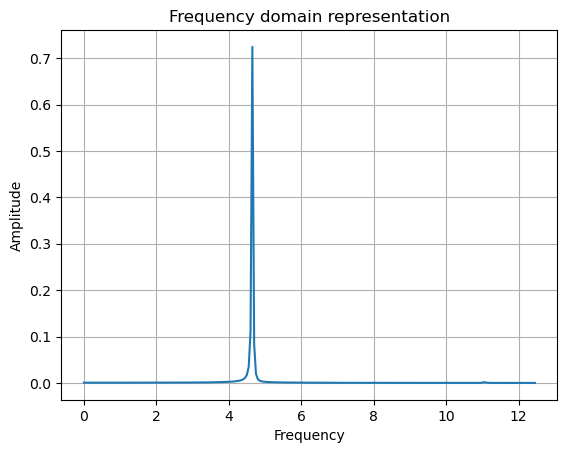

Estimated period: 0.2150537634408602


In [20]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# 假设你的时间序列数据
time_series = result.y[0]

# 计算傅里叶变换
N = len(time_series)
T = 1.0/25  # 假设时间步长为1，可以根据实际情况调整
yf = fft(time_series)
xf = fftfreq(N, T)[:N//2]

# 画出傅里叶变换结果
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.grid()
plt.title('Frequency domain representation')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

# 找到主要的频率
peak_freq = xf[np.argmax(np.abs(yf[:N//2]))]
period = 1 / peak_freq

print(f"Estimated period: {period}")

